# 1.46

## Answer

Consider the following system:

$$
\begin{aligned}
y[n] &= \begin{cases}
    e[n-1] & n \geq 0 \\
    0 & \text{otherwise}
\end{cases} \\[8pt]
e[n] &= x[n] - y[n]
\end{aligned}
$$

### (1) For $x[n]=\delta[n]$

Let $x[n]=\delta[n]=\begin{cases}1 & n=0\\ 0 & \text{otherwise}\end{cases}$. We derive:

$$
\begin{aligned}
y[0] &= x[-1] - y[-1] = 0 \\
y[1] &= x[0] - y[0] = 1 \\
&\quad \vdots \\
y[n] &= -y[n-1] \quad (n \geq 2)
\end{aligned}
$$

Therefore, the final result is:

$$
y[n] = \begin{cases}
(-1)^{n-1} & n \geq 1 \\
0 & \text{otherwise}
\end{cases}
$$

### (2) For $x[n] = u[n]$

Let $x[n] = \begin{cases} 1 & n \ge 0 \\ 0 & {\rm otherwise}\end{cases}$. We derive:

$$
\begin{aligned}
y[0] &= x[-1] - y[-1] = 0, \\
y[1] &= x[0] - y[0] = 1, \\
y[2] &= x[1] - y[1] = 1 - 1 = 0, \\
y[3] &= x[2] - y[2] = 1 - 0 = 1, \\
&\quad \vdots
\end{aligned}
$$

This pattern generalizes to:

$$
y[2k-1] = 1 \quad \text{and} \quad y[2k] = 0 \quad \text{for } k \geq 1.
$$

Therefore, the result is: 

$$
y[n] = \frac{1-(-1)^n}{2}\,u[n-1]
$$

This expression is equivalent to the piecewise definition:

$$
y[n] =
\begin{cases}
0, & n < 0 \text{ or } n \text{ even (including } n=0\text{)} \\
1, & n \ge 1 \text{ and } n \text{ odd}
\end{cases}
$$

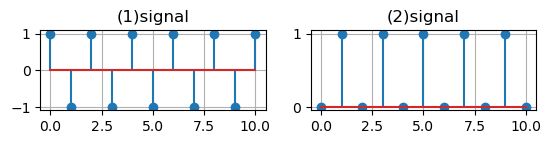

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def draw(x, y, title, a):
    plt.subplot(4, 2, a)
    plt.title(title)
    plt.grid(True)
    plt.stem(x, y)

x = np.linspace(0, 10, 11)
y = (-1)**x
draw(x, y, '(1)signal', 1)

y = (1 - (-1)**x) // 2
draw(x, y, '(2)signal', 2)

# 1.27(b)

$$
y(t) = \cos(3t)x(t)
$$

## Answer

This continuous-time system is analyzed as follows:

1. **Memoryless:** Yes. The output y(t) depends solely on the input x(t) at the same time instant t.
2. **Time-Invariant:** No. Since the multiplier $\cos(3t)$ explicitly depends on time, shifting the input does not simply shift the multiplier. In detail, if the input is shifted by $t_0$ to give $x(t-t_0)$, the output becomes $y(t) = \cos(3t)x(t-t_0)$, which is different from $y(t-t_0) = \cos(3(t-t_0))x(t-t_0)$.
3. **Linear:** Yes. To verify linearity, we check the additivity and homogeneity properties:
   
   - *Additivity:* Suppose for inputs $x_1(t)$ and $x_2(t)$ the responses are 
     $$
     y_1(t)=\cos(3t)x_1(t) \quad \text{and} \quad y_2(t)=\cos(3t)x_2(t).
     $$
     For the input $x_1(t)+x_2(t)$, the output is
     $$
     y(t)=\cos(3t)[x_1(t)+x_2(t)] = \cos(3t)x_1(t)+\cos(3t)x_2(t)=y_1(t)+y_2(t).
     $$
   - *Homogeneity:* For any scalar $a$, if $x(t)$ produces $y(t)=\cos(3t)x(t)$, then the input $ax(t)$ produces 
     $$
     y(t)=\cos(3t)[ax(t)] = a\cos(3t)x(t) = a\,y(t).
     $$
     
   Since both additivity and homogeneity hold, the system is linear.
   
4. **Causal:** Yes. The output at time $t$ depends only on $x(t)$ and $\cos(3t)$ at the same time $t$, with no dependence on future values.
5. **Stable:**  
   For a system to be BIBO (Bounded-Input Bounded-Output) stable, every bounded input must result in a bounded output. Suppose that for all time $ t $ the input satisfies
   $$
   |x(t)| \leq M,
   $$
   where \( M \) is a finite number. Then the output is given by
   $$
   y(t) = \cos(3t)x(t).
   $$
   Notice that since
   $$
   |\cos(3t)| \leq 1 \quad \text{for all } t,
   $$
   it follows that
   $$
   |y(t)| = |\cos(3t)x(t)| \leq |\cos(3t)| \cdot |x(t)| \leq 1 \cdot M = M.
   $$
   This shows that the output remains bounded by the same constant $M$ (or possibly by a scaled constant if a different norm is considered).

   Additionally, even though the multiplier $\cos(3t)$ varies with time, its bounded nature ensures that no unbounded amplification of the input occurs. Therefore, the system is BIBO stable.

# 1.28(b)

$$
y[n] = x[n-2] - 2x[n-8]
$$

## Answer

This discrete-time system is analyzed as follows:

1. **Memoryless:** No.  
   The output depends on past input values $x[n-2]$ and $x[n-8]$ rather than solely on $x[n]$.

2. **Time-Invariance:** Yes.  
   A time shift of the input by $n_0$ results in:
   $$
   y[n] = x[(n-n_0)-2] - 2x[(n-n_0)-8],
   $$
   which is equivalent to shifting the entire output by $n_0$. Thus, the system is time-invariant.

3. **Linear:** Yes.  
   The system is a linear combination of delayed inputs with constant coefficients; hence, it satisfies both the additivity and homogeneity properties.

4. **Causal:** Yes.  
   The output at time $n$ depends only on $x[n-2]$ and $x[n-8]$, which are past (or present) values relative to $n$. Therefore, the system is causal.

5. **Stable:** Yes.  
   The system is a finite impulse response (FIR) filter. Its impulse response is
   $$
   h[n] = \delta[n-2] - 2\delta[n-8],
   $$
   and the sum of the absolute values of the impulse response is
   $$
   \sum_{n=-\infty}^{\infty} |h[n]| = |1| + |2| = 3,
   $$
   which is finite. Therefore, the system is BIBO (Bounded-Input Bounded-Output) stable.